## Import Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import copy
import warnings
warnings.filterwarnings("ignore")

## Get the Data

In [12]:
data = pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/Kmeans_assignment_data.csv")
copied_data=copy.deepcopy(data)

**Check the head of the data**

In [43]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15



## Data Description

* **Private A factor with levels No and Yes indicating private or public university**
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

**Get the data info**

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

**Get the data description**

In [45]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

**A scatterplot of Grad.Rate versus Room Board
the points are colored by the Private column**

Text(0.5, 1.0, 'Relation between graduation rating and the costing of rooms and boards : ')

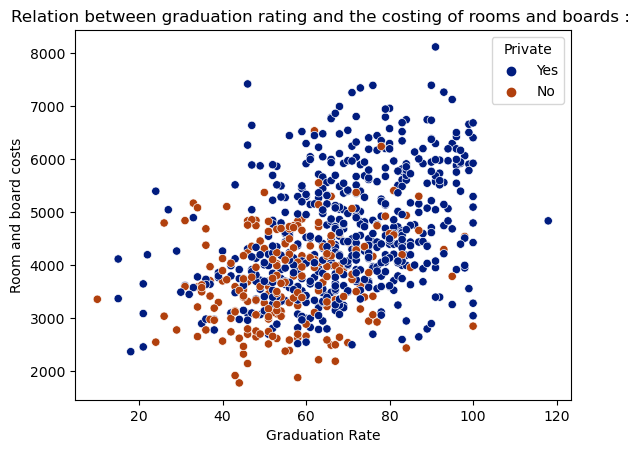

In [46]:
sns.scatterplot(x=data["Grad.Rate"],y=data["Room.Board"],hue=data["Private"],palette='dark')
plt.xlabel("Graduation Rate")
plt.ylabel("Room and board costs")
plt .title("Relation between graduation rating and the costing of rooms and boards : ")

**A scatterplot of F.Undergrad versus Outstate
where the points are colored by the Private column.**

Text(0.5, 1.0, 'Relation between Number of fulltime undergraduates and Out-of-state tuition : ')

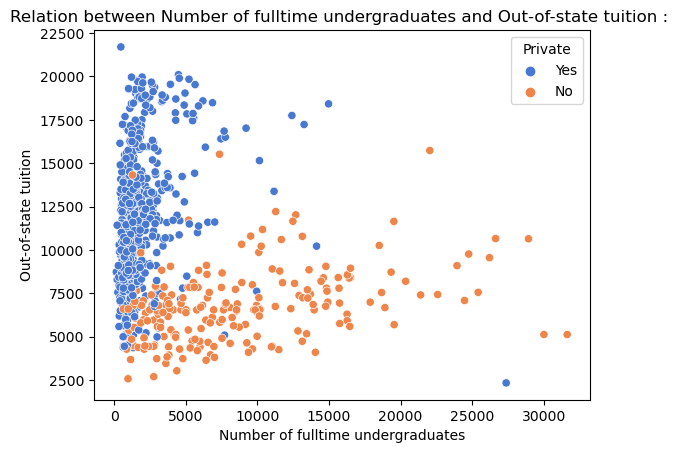

In [47]:
sns.scatterplot(x=data["F.Undergrad"],y=data["Outstate"],hue=data["Private"],palette='muted')
plt.xlabel("Number of fulltime undergraduates")
plt.ylabel("Out-of-state tuition")
plt .title("Relation between Number of fulltime undergraduates and Out-of-state tuition : ")

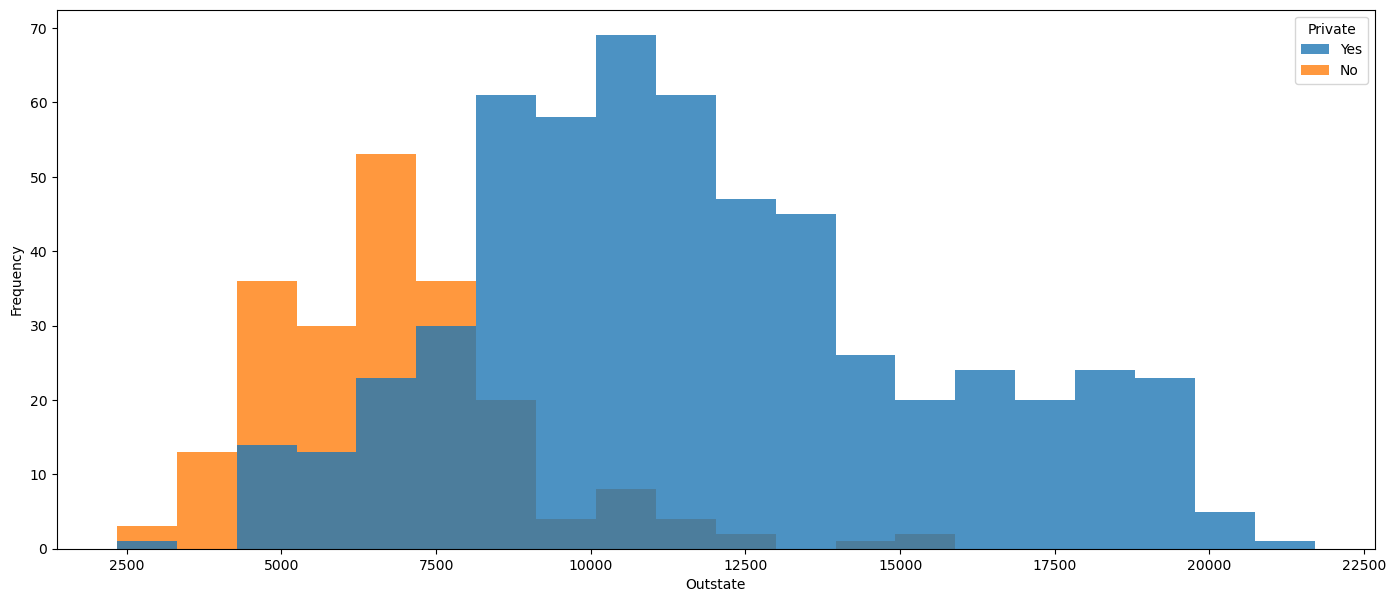

In [102]:
plt.figure(figsize=(17, 7))
sns.histplot(data=data, x="Outstate", hue="Private",edgecolor='none',alpha=0.8,bins=20)
plt.xlabel('Outstate')
plt.ylabel('Frequency')
plt.show()

**Create a similar histogram for the Grad.Rate column.**

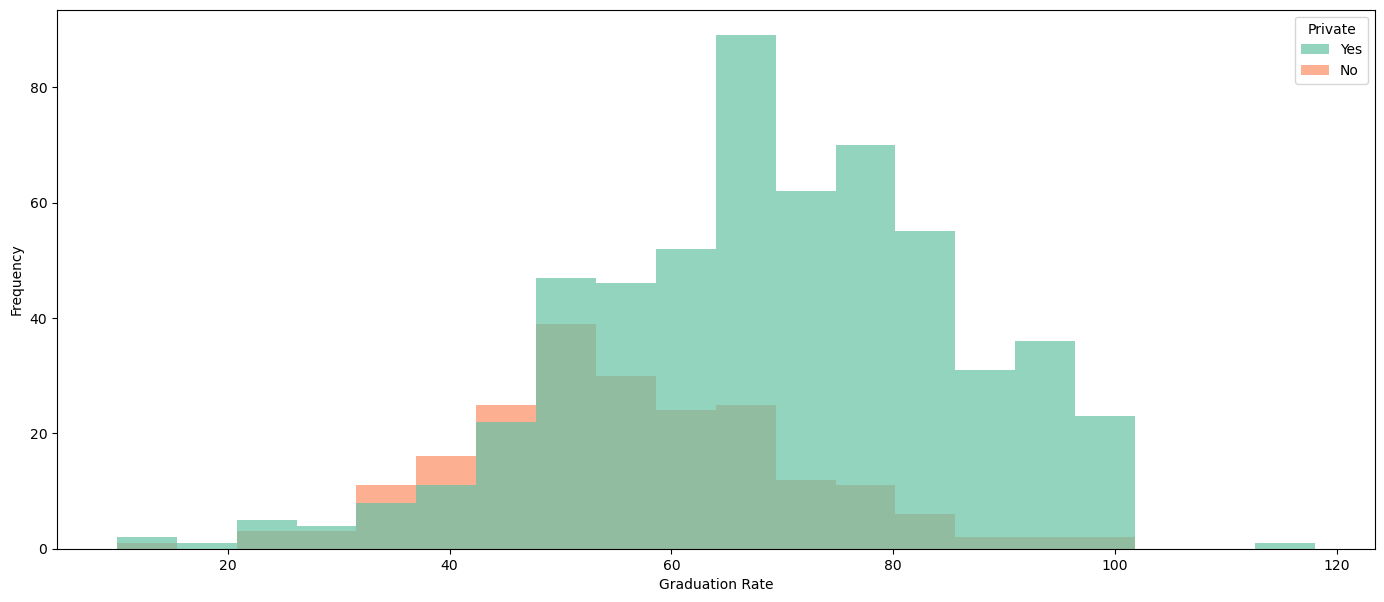

In [100]:
plt.figure(figsize=(17, 7))
sns.histplot(data=data, x="Grad.Rate", hue="Private", palette="Set2", edgecolor='none', alpha=0.7, bins=20)
plt.xlabel('Graduation Rate')
plt.ylabel('Frequency')
plt.show()

In [13]:
data.drop(columns=["Private","Unnamed: 0"],axis=1,inplace=True)

In [14]:
ScaledData=StandardScaler().fit_transform(data)

In [15]:
ScaledData

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

-------

## K Means Clustering

**Applying Elbow Method to determine the best number of clusters**

In [16]:
pca=PCA()
pca.fit(ScaledData)

PCA()

**Showing a graph of the elbow method**

Text(0, 0.5, 'Variance')

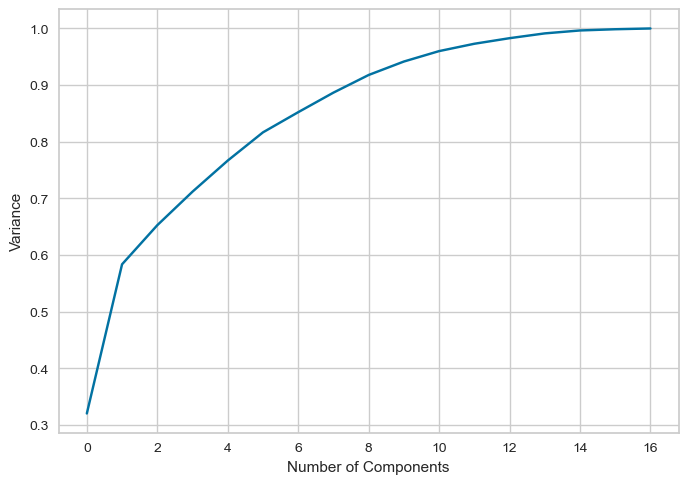

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance")

(0.0, 8.0)

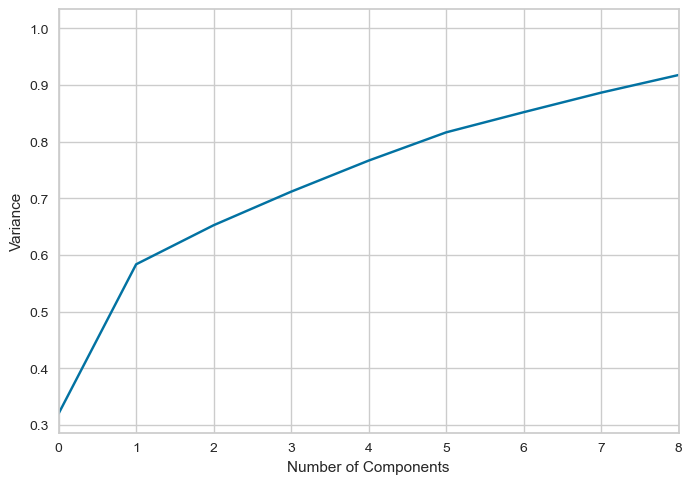

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance")
plt.xlim(0,8,1)

In [31]:
pca=PCA(n_components=8)
PcaData=pca.fit_transform(ScaledData)

In [32]:
PcaData

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
        -2.98306081e-01,  6.38443468e-01, -8.79386137e-01],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
        -1.77137309e-01,  2.36753302e-01,  4.69253269e-02],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -9.60591689e-01, -2.48276091e-01,  3.08740489e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
         4.68014248e-01, -1.31749158e+00, -1.28288447e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
        -2.06993738e+00,  8.33276555e-02, -5.52585842e-01],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
         8.39893087e-01,  1.30731260e+00,  6.27409633e-01]])

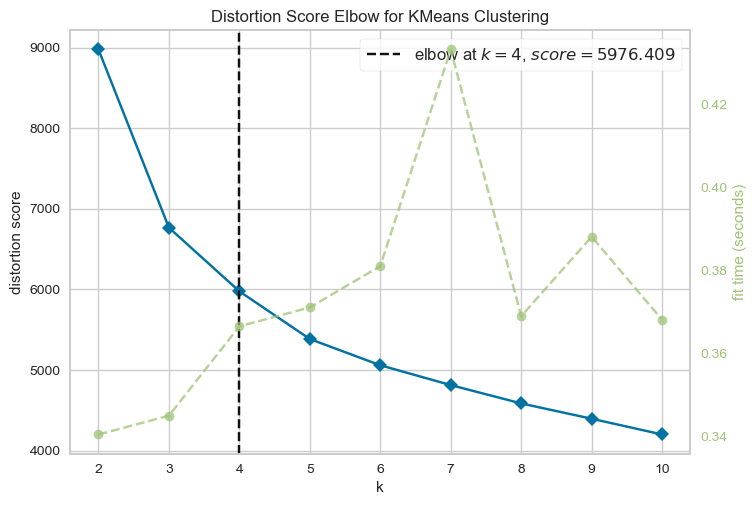

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
elbow_method = KElbowVisualizer(KMeans(), k = 10)
elbow_method.fit(PcaData)
elbow_method.show()

In [35]:
scores = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(PcaData)
    scores.append(kmeans_model.inertia_)

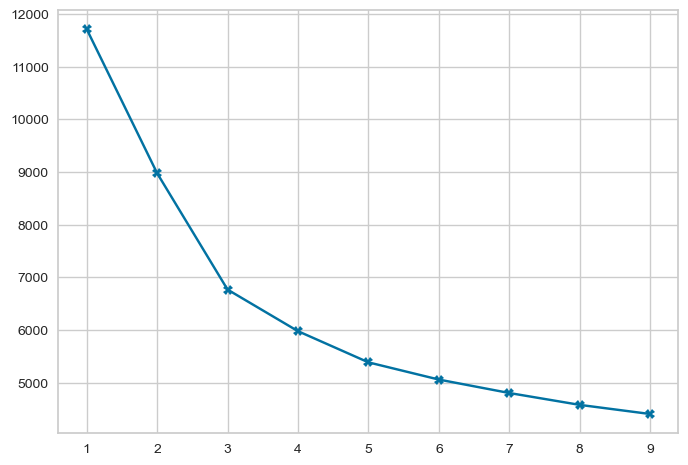

In [36]:
plt.plot(k_range, scores, marker = 'X')

(1.0, 5.0)

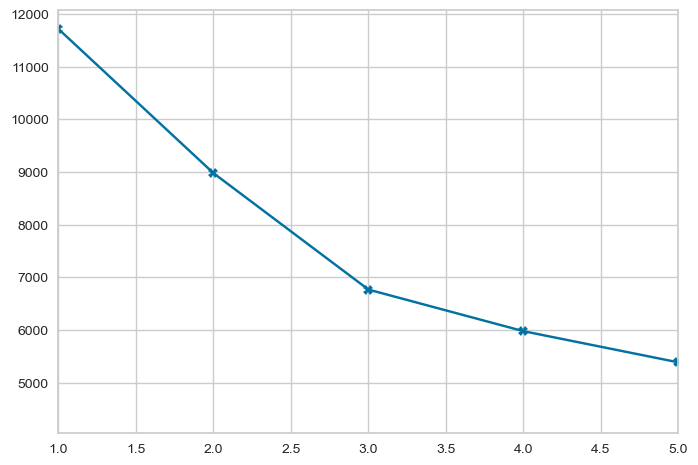

In [37]:
plt.plot(k_range, scores, marker = 'X')
plt.xlim(1,5,1)

**Showing the silhoutte score**

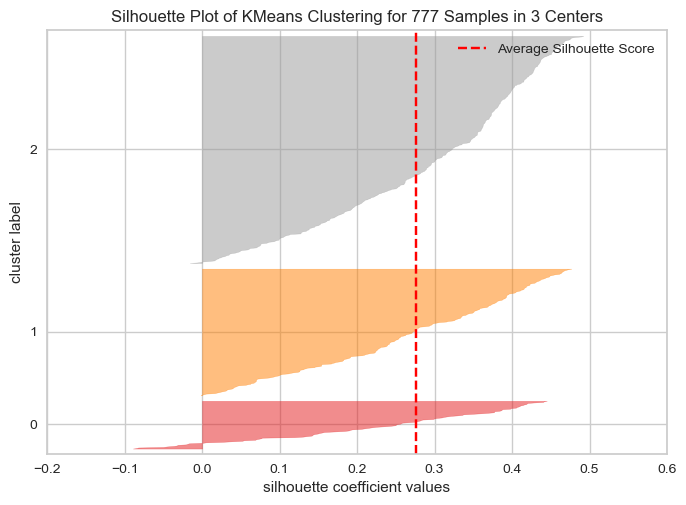

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 777 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
model = KMeans(3, random_state = 42)
visualizer = silhouette_visualizer(model,PcaData)
visualizer.fit(PcaData)
visualizer.show()

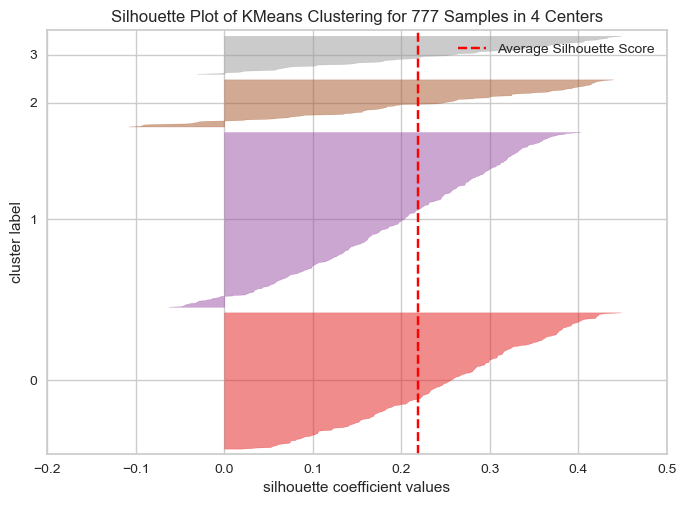

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 777 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
model = KMeans(4, random_state = 42)
visualizer = silhouette_visualizer(model,PcaData)
visualizer.fit(PcaData)
visualizer.show()

In [40]:
scores = []
silhouette_scores  = []

k_range = range(2,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    Ypred = kmeans_model.fit_predict(PcaData)
    scores.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(PcaData, Ypred))
    
    print("k = ", k )
    print("silhouette score : %0.4f" % silhouette_score(PcaData, Ypred))

k =  2
silhouette score : 0.2557
k =  3
silhouette score : 0.2750
k =  4
silhouette score : 0.2184
k =  5
silhouette score : 0.2184
k =  6
silhouette score : 0.1924
k =  7
silhouette score : 0.1673
k =  8
silhouette score : 0.1707
k =  9
silhouette score : 0.1558


## 
The final value for k is 3

**Fitting the KMeans model with the best number of clusters**

In [41]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(PcaData)
Ypred = km.predict(PcaData)

**Showing the clusters center**

In [43]:
km.cluster_centers_

array([[ 1.75968135e+00,  4.44229260e+00,  2.02203498e-03,
         1.44274355e-01,  3.42518065e-02, -1.59477515e-01,
        -6.52767864e-02,  2.42028169e-01],
       [ 2.17534755e+00, -1.45723440e+00, -3.46434366e-02,
        -2.18582557e-01,  3.09346083e-02,  8.33686076e-02,
         6.05676774e-02,  1.41745717e-02],
       [-1.58681211e+00, -1.27814998e-01,  1.89056782e-02,
         9.14241719e-02, -2.45202666e-02, -1.27423689e-02,
        -1.99734393e-02, -5.91831203e-02]])

**The Prediction**

In [42]:
Ypred

array([2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0,
       2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,

In [44]:
data["Privacy Clusters"]=Ypred

**Scatter plots showing the clusters**

Text(0.5, 1.0, 'Relation between graduation rating and the costing of rooms and boards : ')

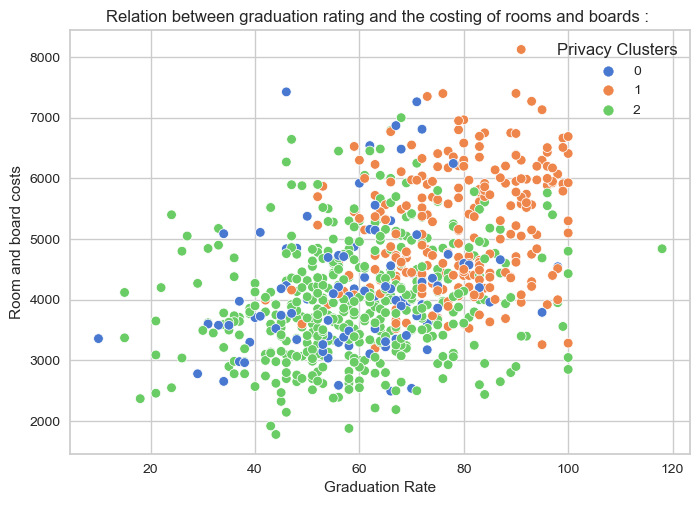

In [47]:
sns.scatterplot(x=data["Grad.Rate"],y=data["Room.Board"],hue=data["Privacy Clusters"],palette='muted')
plt.xlabel("Graduation Rate")
plt.ylabel("Room and board costs")
plt .title("Relation between graduation rating and the costing of rooms and boards : ")

Text(0.5, 1.0, 'Relation between Number of fulltime undergraduates and Out-of-state tuition : ')

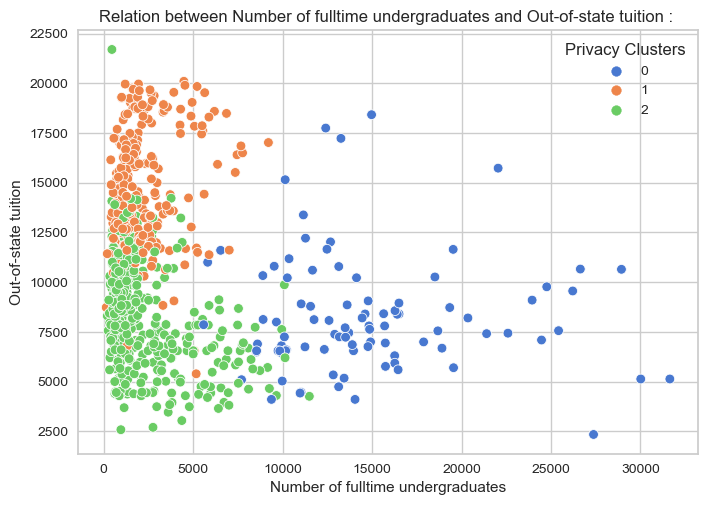

In [46]:
sns.scatterplot(x=data["F.Undergrad"],y=data["Outstate"],hue=data["Privacy Clusters"],palette='muted')
plt.xlabel("Number of fulltime undergraduates")
plt.ylabel("Out-of-state tuition")
plt .title("Relation between Number of fulltime undergraduates and Out-of-state tuition : ")

In [53]:
cluster0=data[data["Privacy Clusters"]==0]

In [54]:
cluster0

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Privacy Clusters
21,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,0
23,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48,0
27,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,0
39,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.5,38,7503,72,0
59,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.9,16,16836,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,4963,3497,1567,18,45,10262,5065,10217,4182,500,3630,81,87,8.7,11,11183,45,0
713,15712,11719,4277,29,53,18511,604,10260,3176,740,2200,85,89,13.8,20,8944,73,0
727,6540,5839,2440,31,70,14445,1344,8200,4210,800,2719,84,87,16.9,30,10912,56,0
743,9167,7191,2738,24,53,15739,4278,6940,4100,500,1700,80,84,24.7,11,5983,55,0


In [55]:
cluster1=data[data["Privacy Clusters"]==1]

In [56]:
cluster1

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Privacy Clusters
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
6,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63,1
7,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73,1
8,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80,1
10,1732,1425,472,37,75,1830,110,16548,5406,500,600,82,88,11.3,31,10932,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,167,130,46,16,50,199,676,11428,5084,450,475,67,76,8.3,43,10291,67,1
769,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78,1
770,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75,1
771,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82,1


In [58]:
cluster2=data[data["Privacy Clusters"]==2]

In [59]:
cluster2

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Privacy Clusters
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,2
5,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50,2
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,2
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,2
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,2
